# EDA of The Energy CSV file

Imports.

Commentary on the results of various graphs is included in the comments below the code that generated that graph.

After finishing the initial EDA, you can change which read command is commented out, to check statistics for your cleaned file.


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import sklearn as skl

pd.set_option("display.max_columns", 555)
pd.set_option("display.max_rows", 555)

#df_energy_unclean = pd.read_csv('../data/appliances_energy/energy_appliances_cleaned.csv')

df_energy_unclean = pd.read_csv('../data/appliances_energy/Uncleaned_energy_appliances.csv')


# Prices Exploration

In [114]:
df_energy_unclean.columns
#all the columns to examine
#worth noting the number represents a room, RH means humidity, T means temperature

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [115]:
df_energy_unclean.dtypes
#Data types. Nice and clean, just need to convert date.

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [116]:
df_energy_unclean.describe()
#initial look at the measures of central tendancy of each numeric column. 

#some interesting stuff can be noticed such as:

# light's distribution looks weird, most of it is 0
# since most values are continuous real world values, they dont look weird.
# count being 19735 is quite large, much larger than the house price data set.

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [117]:
df_energy_unclean.head()
#an initial look at what kinds of values are in each column

# Noticably, many values are going up in increments (due to limitations of the device that measured them)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [118]:
df_energy_unclean.duplicated().sum()
#checking if any duplicate rows exist. Would clean them if so, but non are dupes.

0

In [119]:
df_energy_unclean.nunique()

#checking how many unique values are in each column.
#Lights & appliances are pretty low, worth checking whats going on there. 
#The rest are random


date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [120]:
df_energy_unclean.isna().sum()

#a count of how many nans each column has (out of 1460 rows)

#all data is filled, so no problems here

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [121]:

df_energy_unclean['Appliances'].value_counts()
#df_energy_unclean['lights'].value_counts()

#number of times each value shows up in a column. useful for checking what kinds of values a column has

# it seems energy used (watts/hour) was only tracked in intervals of 10.
# also appliances use way more energy than lights (obviously)

Appliances
50      4368
60      3282
40      2019
70      1560
80      1205
90      1015
100      978
110      736
30       723
120      502
20       343
130      330
140      223
150      144
160       90
260       89
270       87
190       86
240       84
230       82
280       82
180       78
250       77
300       73
220       73
170       70
310       70
290       69
210       69
330       66
350       62
390       62
360       62
340       61
320       60
370       59
200       58
400       46
380       43
410       40
420       33
440       33
430       25
450       24
470       24
480       21
460       21
510       19
490       18
590       17
610       16
530       16
600       15
620       14
560       14
520       13
500       13
580       11
660       11
630       11
550       10
540       10
700        9
690        9
10         9
570        8
710        8
750        7
650        7
720        7
640        7
680        6
740        5
670        4
780        4
790        4
7

In [122]:
for i in df_energy_unclean.columns:
    print(df_energy_unclean[i].value_counts().head(1))
    print("-----")


#For every column, show the single highest frequency value & count
#No useful information here


date
2016-01-11 17:00:00    1
Name: count, dtype: int64
-----
Appliances
50    4368
Name: count, dtype: int64
-----
lights
0    15252
Name: count, dtype: int64
-----
T1
21.0    514
Name: count, dtype: int64
-----
RH_1
39.09    152
Name: count, dtype: int64
-----
T2
19.2    331
Name: count, dtype: int64
-----
RH_2
40.0    135
Name: count, dtype: int64
-----
T3
22.39    433
Name: count, dtype: int64
-----
RH_3
37.59    243
Name: count, dtype: int64
-----
T4
20.39    348
Name: count, dtype: int64
-----
RH_4
38.59    169
Name: count, dtype: int64
-----
T5
18.6    385
Name: count, dtype: int64
-----
RH_5
49.0    89
Name: count, dtype: int64
-----
T6
6.4    86
Name: count, dtype: int64
-----
RH_6
1.0    1452
Name: count, dtype: int64
-----
T7
18.5    453
Name: count, dtype: int64
-----
RH_7
33.9    131
Name: count, dtype: int64
-----
T8
22.79    386
Name: count, dtype: int64
-----
RH_8
39.5    95
Name: count, dtype: int64
-----
T9
20.5    487
Name: count, dtype: int64
-----
RH_9
39.2    165


<Axes: xlabel='Appliances', ylabel='T_out'>

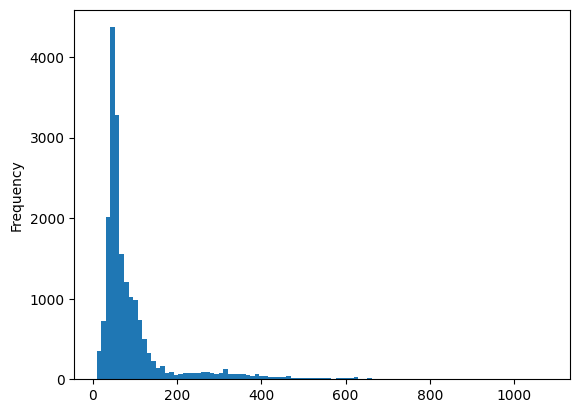

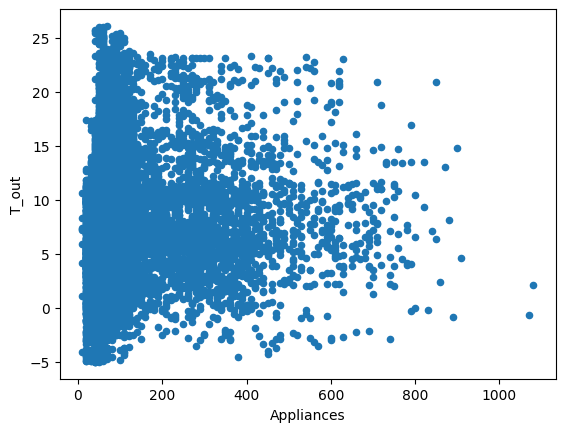

In [123]:
df_energy_unclean['Appliances'].plot(kind='hist' , bins = 100)
df_energy_unclean.plot(kind='scatter', x = 'Appliances', y = 'T_out')

#histograms to look at the distribution of a column, such as the odd MSSubClass
# Or scatter plots that can be used to compare 2 columns
# no noticable link between outside temperature and appliance energy usage.


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lights,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T1,NaN,NaN,1.000000,NaN,0.836834,NaN,0.892402,NaN,0.877001,NaN,0.885247,NaN,0.654769,-0.615045,0.838705,NaN,0.825413,NaN,0.844777,NaN,0.682846,NaN,NaN,NaN,NaN,0.571309,NaN,NaN
RH_1,NaN,NaN,NaN,1.000000,NaN,0.797535,NaN,0.844677,NaN,0.880359,NaN,NaN,NaN,NaN,NaN,0.801122,NaN,0.736196,NaN,0.764001,NaN,NaN,NaN,NaN,NaN,0.639106,NaN,NaN
T2,NaN,NaN,0.836834,NaN,1.000000,NaN,0.735245,NaN,0.762066,NaN,0.720550,NaN,0.801186,-0.580372,0.663660,NaN,0.578191,NaN,0.675535,NaN,0.792255,NaN,-0.505291,NaN,NaN,0.582602,NaN,NaN
RH_2,NaN,NaN,NaN,0.797535,NaN,1.000000,NaN,0.678326,NaN,0.721435,NaN,NaN,NaN,NaN,NaN,0.690584,NaN,0.679777,NaN,0.676467,NaN,NaN,0.584911,NaN,NaN,NaN,NaN,NaN
T3,NaN,NaN,0.892402,NaN,0.735245,NaN,1.000000,NaN,0.852778,NaN,0.888169,NaN,0.686882,-0.647672,0.847374,NaN,0.795283,NaN,0.901324,NaN,0.699417,NaN,NaN,NaN,NaN,0.645886,NaN,NaN
RH_3,NaN,NaN,NaN,0.844677,NaN,0.678326,NaN,1.000000,NaN,0.898978,NaN,NaN,NaN,0.514912,NaN,0.832685,NaN,0.828822,NaN,0.833538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T4,NaN,NaN,0.877001,NaN,0.762066,NaN,0.852778,NaN,1.000000,NaN,0.871813,NaN,0.652350,-0.703149,0.877763,NaN,0.796256,NaN,0.889439,NaN,0.663478,NaN,NaN,NaN,NaN,0.519471,NaN,NaN
RH_4,NaN,NaN,NaN,0.880359,NaN,0.721435,NaN,0.898978,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.894301,NaN,0.847259,NaN,0.856591,NaN,NaN,NaN,NaN,NaN,0.616509,NaN,NaN


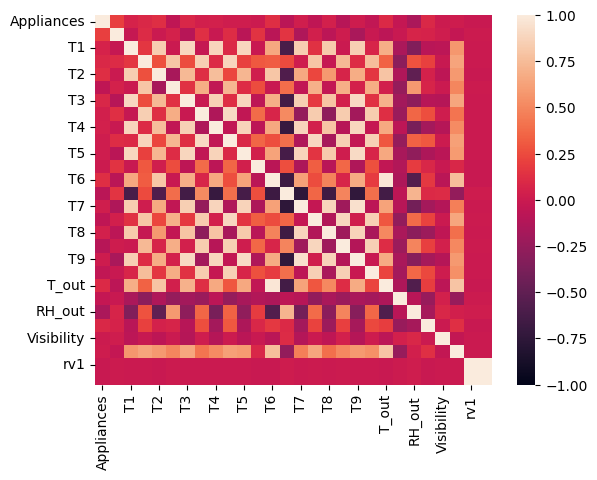

In [124]:


sea.heatmap(df_energy_unclean.select_dtypes(include=np.number).corr(), vmin=-1, vmax=1)
df_energy_corr = df_energy_unclean.select_dtypes(include=np.number).corr()

#this line helps identify highly correlated variables. Can be commented out to view all the data.
df_energy_corr[np.abs(df_energy_corr) > 0.5]

#A correlation chart to help understand how the columns related to eachother.
#A lot of variables are extremely correlated with eachother, especially temperatures with temperatures & humidities with humidities
#this makes sense since all that would be separating these spaces in the house is at most a door.
#interestingly, the bathroom humidity (RH_5) is a lot less related compared to the other measures. Maybe it's far away from the rest?
#also most of the outside measures relate very poorly to inside ones, except for the temperature.
#the most correlated columns are the weather stations outside temperature (T_out) & the creators outside temperature measure (T6), 0.97

#Heat map:
#due to how the data alternates temperature measure - humidity measure in order, it makes a cool checker board pattern.

In [125]:
#Generates a ton of scatter plots. Takes a few minutes so comment out if needed.
"""
numeric_cols = df_energy_unclean.select_dtypes(include=[np.number]).columns.tolist()
df_energy_unclean_numerics = df_energy_unclean[numeric_cols].copy()

sea.pairplot(df_energy_unclean_numerics, vars = df_energy_unclean_numerics.columns)
"""

#very useful scatter plot chart of every numeric variable compared to every numeric variable.
#copy & paste it into windows paint to zoom in and stuff.
#this takes 3 min to run, so comment out if you don't need to see it

#Not very interesting scatter plots unfortunately. Shows how energy is measured in intervals again, 
# and that a lot of columns are heavily correlated with others.
# It's really obvious how rv1 and rv2 (the last 2 columns) are just completely random numbers.


'\nnumeric_cols = df_energy_unclean.select_dtypes(include=[np.number]).columns.tolist()\ndf_energy_unclean_numerics = df_energy_unclean[numeric_cols].copy()\n\nsea.pairplot(df_energy_unclean_numerics, vars = df_energy_unclean_numerics.columns)\n'

In [ ]:
#now that the analysis is finished, we can use what we learned to clean the data effectively.

#delete due to being useless conceptially... unless?
to_delete1 = [
    'rv1',
    'rv2'
]



#opening the df & dropping whats specified above, based on the EDA
df = pd.read_csv('../data/appliances_energy/Uncleaned_energy_appliances.csv')

df = df.drop(columns=to_delete1, errors='ignore')


""" 

#for the loops below
feature_columns = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()



#encode categorical string based features as 0 or 1's
for i in feature_columns:
    my_ohe = skl.preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
    ohetransform = my_ohe.fit_transform(df[[i]])
    df = pd.concat([df, ohetransform], axis=1).drop(columns=[i])

#drops feature columns. Use if not converting features into numbers with the above loop.

for i in feature_columns:
    df = df.drop(columns = [i])
"""

#converting time into a more useful form
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop(columns=['date'])




"""
Q1, Q3 = df['SalePrice'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[(df['SalePrice'] >= Q1 - 1.5*IQR) & (df['SalePrice'] <= Q3 + 1.5*IQR)]
"""



#encoding hour, month, day, day of week as 0-1 for each
#did

feature_columns = ['hour', "day_of_week", "month", "day"]

for i in feature_columns:
    my_ohe = skl.preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
    ohetransform = my_ohe.fit_transform(df[[i]])
    df = pd.concat([df, ohetransform], axis=1).drop(columns=[i])


#standard scalar appeared to have made the results worse.

numeric_cols = [
    "lights", "T1", "RH_1", "T2", "RH_2", "T3", "RH_3", "T4", "RH_4",
    "T5", "RH_5", "T6", "RH_6", "T7", "RH_7", "T8", "RH_8", "T9", "RH_9",
    "T_out", "Press_mm_hg", "RH_out", "Windspeed", "Visibility", "Tdewpoint"
]

my_scale = skl.preprocessing.StandardScaler()
df[numeric_cols] = my_scale.fit_transform(df[numeric_cols])


df.to_csv('../data/appliances_energy/appliances_energy_cleaned_v2.csv', index=False)

"""
df = pd.read_csv('../data/appliances_energy/Uncleaned_energy_appliances.csv')

df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df_clean = df.drop(columns=['date', 'rv1', 'rv2'])

cols = ['Appliances'] + [col for col in df_clean.columns if col != 'Appliances']
df_clean = df_clean[cols]

df_clean.to_csv('../data/appliances_energy/appliances_energy_cleaned.csv', index=False)
print(f"Shape: {df_clean.shape}")
"""

df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,month_1,month_2,month_3,month_4,month_5,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Exploration of the newly cleaned data was done by changing the file loaded at the start of this to the newly cleaned data, then browsing the graphs/data.

Further refinement on what to include/exclude in the cleaned data was done via testing the ML algorithms with different cleaned data.